<a href="https://colab.research.google.com/github/suciucos33/HACKATHON-TEAM-LASER-2021/blob/main/JC_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 2 - Rabi flops using Jaynes-Cummings Model

- Install QuTiP

In [505]:
#Uncomment below to install QuTiP 
#!pip install qutip

- Import numpy and other utility libraries

In [506]:
%matplotlib inline
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
import math

- Set up parameters

In [507]:
N = 20            #cavity number states number
n_th = 0          #thermal photon number
g = 2*np.pi*0.05     #atom-cavity copuling strength
om_a = 2*np.pi*0.1  #atom resonant frequency
om_c = 2*np.pi*0.1  #cavity resonant frequency
k = 0.00000001         #cavity decay rate
gam = 0.001      #atom decay rate
hbar = 1          #planck constant

t = np.linspace(0,500,10000)

- Set up input state


In [508]:
#init_state = tensor(basis(N,0), basis(2,1))
#init_state = tensor(basis(N,0), (1/math.sqrt(2))*(basis(2,0)+basis(2,1)))
init_state = tensor(coherent(N,math.sqrt(10)), basis(2,1))

- Set up operators

In [509]:
A = tensor(destroy(N), qeye(2))
Sig_m = tensor(qeye(N), destroy(2))

- Set up Hamiltonian

In [510]:
#H_JC = hbar*( om_c * A.dag() * A + om_a * (Sig_m.dag() * Sig_m - Sig_m*Sig_m.dag())/2 + g * (A.dag() + A) * (Sig_m + Sig_m.dag())/2 ) #Normal
H_JC = hbar*( om_c * A.dag() * A + om_a * (Sig_m.dag() * Sig_m - Sig_m*Sig_m.dag())/2 + g * (A.dag()*Sig_m + A*Sig_m.dag())/2 ) #Rotating Wave

- Setting up jump operators

In [511]:
c = []

r1 = k * (1 + n_th)
if r1 > 0.0:
    c.append(math.sqrt(r1) * A)

r2 = k * (n_th)
if r2 > 0.0:
    c.append(math.sqrt(r2) * A.dag())

if gam > 0.0:
    c.append(math.sqrt(gam) * Sig_m)



- Evolve the system in time

In [512]:
out = mesolve(H_JC, init_state*init_state.dag(), t, c, [Sig_m.dag() * Sig_m, Sig_m.dag(), A.dag()*A])

- Data analysis

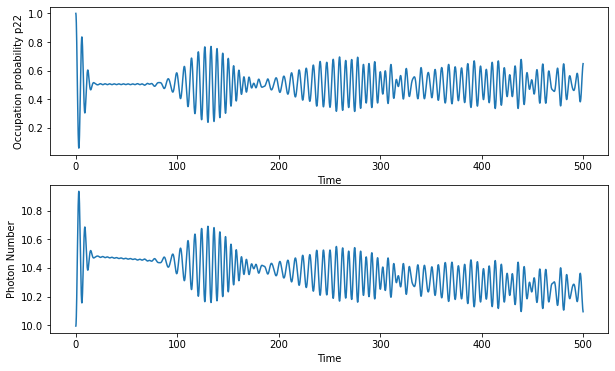

In [513]:
p_2 = out.expect[0]
n = out.expect[2]
coh = out.expect[1].imag

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,6))

ax1.plot(t, p_2)
ax1.set_xlabel('Time')
ax1.set_ylabel('Occupation probability p22')

ax2.plot(t, n)
ax2.set_xlabel('Time')
ax2.set_ylabel('Photon Number')
fig.show()